# Titanic - Exploración de datos

El objetivo del siguiente notebook es hacer una exploración de los datos del Dataset del Titanic ("DS_Clase_05_titanic.csv").

Pueden encontrar más información al respecto en el siguiente link:

https://www.kaggle.com/c/titanic

Más adelante hablaremos más acerca de Kaggle, pero por ahora les comentamos que es una página donde se suben Dataset y la gente los analiza. En general los datasets están bastante curados y la gente sube los "Kernels" (Notebooks) que usaron para analizarlos. La página está buenísima, recomendamos que exploren los kernels de análisis del Titanic - al menos los de mayor puntaje - y miren las competencias que hay.

## 1. Análisis Exploratorio de Datos

La idea del siguiente análisis es que sea lo menos guiado posible. De todas formas, dejamos una serie de preguntas y pistas que no deberían faltar:

1. ¿Qué forma tiene el dataset? Hacer una descripción rápida. Pista: `.describe()`
2. ¿De qué tipo son las variables y qué valores toman? Pista: `.info()`
3. ¿En qué columnas hay valores faltantes?¿Cuántos? Pista: `.info(), .isna(), sum()`
4. ¿Cómo son las distribuciones y las relaciones entre variables?¿Son informativos esos gráficos? Concentrarse en las variables más relevantes: género, edad, clase, etc. Pista: `pairplot()`
5. ¿Cómo están correlacionadas las variables?

## 2. Extrayendo información

"Mujeres y niños primero". ¿Será cierto? Intentemos fundamentar (o no) esa afirmación con la información disponible en el dataset. Para ello, responder las siguientes preguntas:

1. ¿Cuántos hombres y mujeres sobrevivieron a la tragedia?¿Alcanza con esa información para afirmar que las mujeres tenían mayor probabilidad de supervivencia o necesitamos algo más?
2. ¿Cuál era la distribución de edades en el Titanic?¿Es la misma para hombres y mujeres?
3. ¿Cuál era la distribución de edades en el Titanic?¿Es la misma para hombres y mujeres?

Recuerden, siempre que puedan, hacer un lindo gráfico. 


In [1]:
#1 cargo el dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set()

titanic= pd.read_csv('ds_encuentro_titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analisis Exploratirio de Datos

In [3]:
#¿Qué forma tiene el dataset? Hacer una descripción rápida. Pista: .describe()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#De qué tipo son las variables y qué valores toman? Pista: .info()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#¿En qué columnas hay valores faltantes?¿Cuántos? Pista: .info(), .isna(), sum()
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

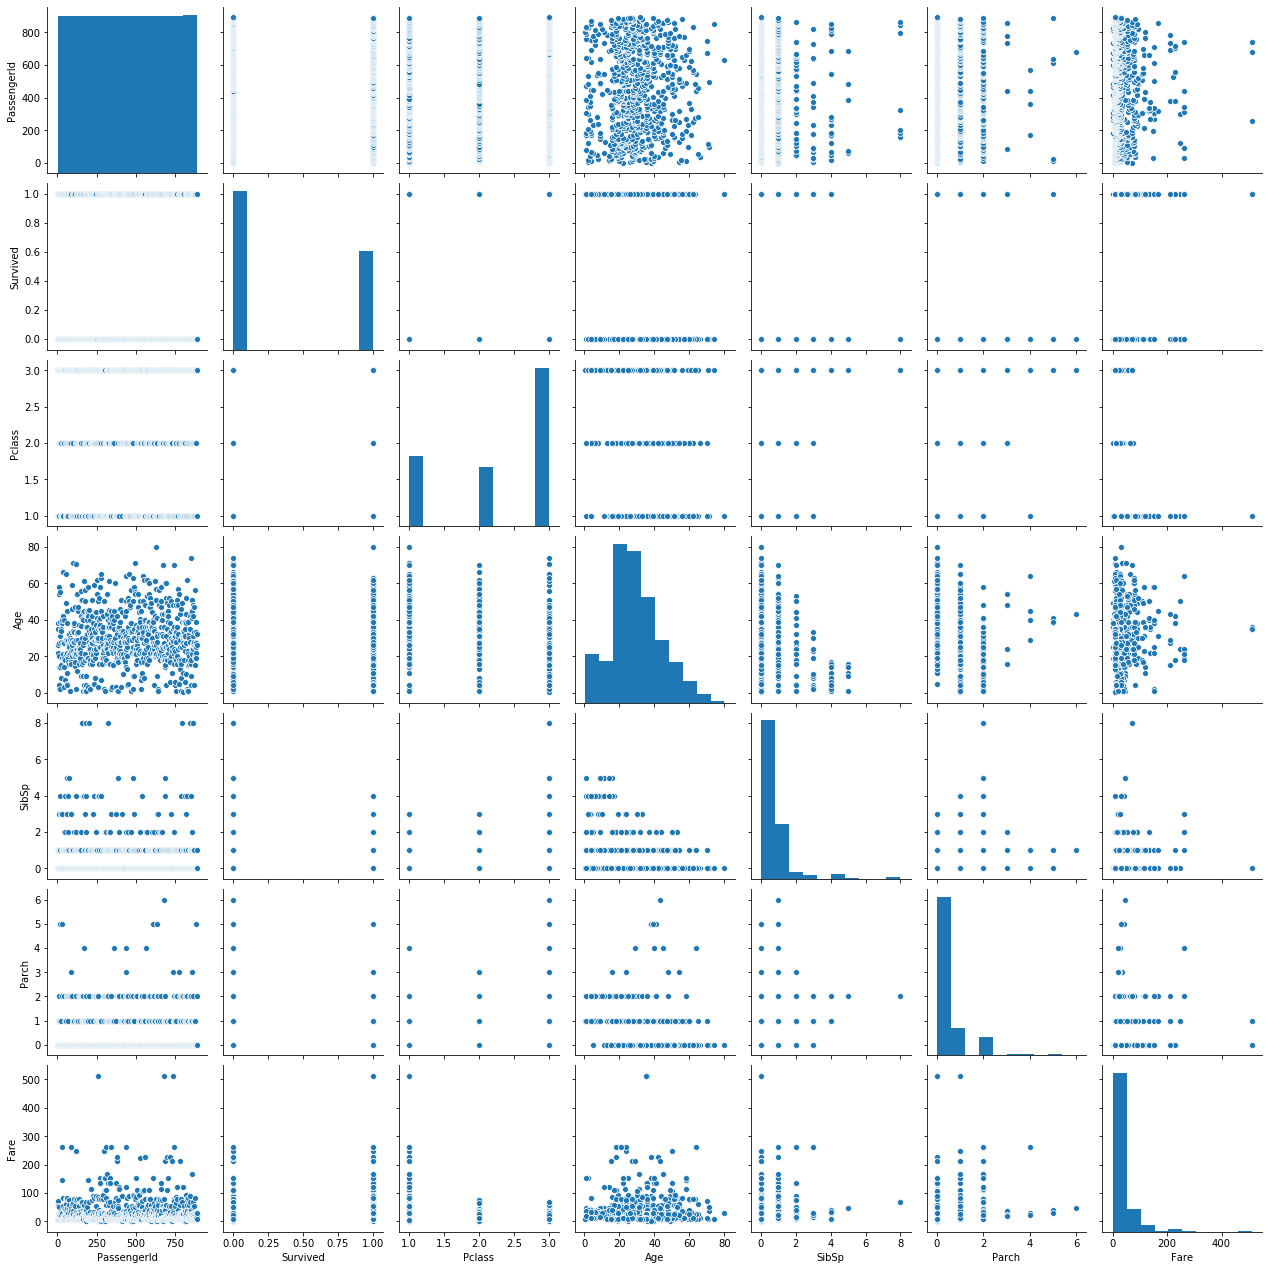

In [6]:
#Cómo son las distribuciones y las relaciones entre variables?¿Son informativos esos gráficos? Concentrarse en las variables más relevantes:
#género, edad, clase, etc. Pista: pairplot()

sns.pairplot(data=titanic)

2. Extrayendo información

In [7]:
#¿Cuántos hombres y mujeres sobrevivieron a la tragedia?
#¿Alcanza con esa información para afirmar que las mujeres tenían mayor probabilidad de supervivencia o necesitamos algo más?
male=len(titanic[(titanic.Sex == 'male') & (titanic.Survived== 1)])
print("los hombres que sobrevivieron son : "+ str(male))

los hombres que sobrevivieron son : 109


In [8]:
female=len(titanic[(titanic.Sex == 'female') & (titanic.Survived== 1)])
print("los hombres que sobrevivieron son : "+ str(female))

los hombres que sobrevivieron son : 233


In [9]:
#no alcanza deberíamos de tener los numeros totales
total_male=len(titanic[(titanic.Sex == 'male')])

In [10]:
print("los hombres en total  son : "+ str(total_male))

los hombres en total  son : 577


In [11]:
total_female=len(titanic[(titanic.Sex == 'female')])

In [12]:
print("los mujeres en total  son : "+ str(total_female))

los mujeres en total  son : 314


In [13]:
print("El porcentaje de hombre que se salvó: "+str(male/total_male*100))

El porcentaje de hombre que se salvó: 18.890814558058924


In [14]:
print("El porcentaje de mujeres que se salvó: "+str(female/total_female*100))

El porcentaje de mujeres que se salvó: 74.20382165605095


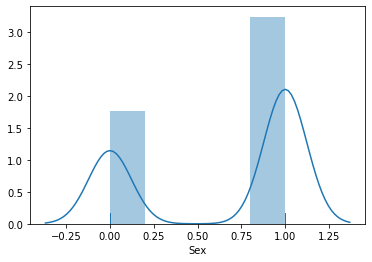

In [15]:
#¿Cuál era la distribución de edades en el Titanic?¿Es la misma para hombres y mujeres?
sns.distplot(titanic.Sex=='male', hist=True, kde=True, rug=True)

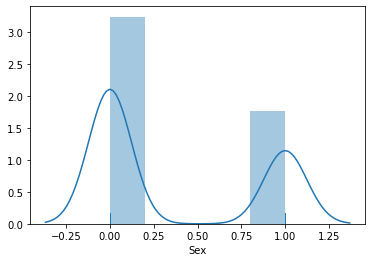

In [16]:
sns.distplot(titanic.Sex=='female', hist=True, kde=True, rug=True)

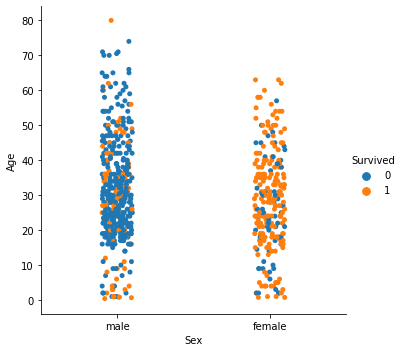

In [17]:
sns.catplot(data=titanic, y="Age",x="Sex",hue="Survived")

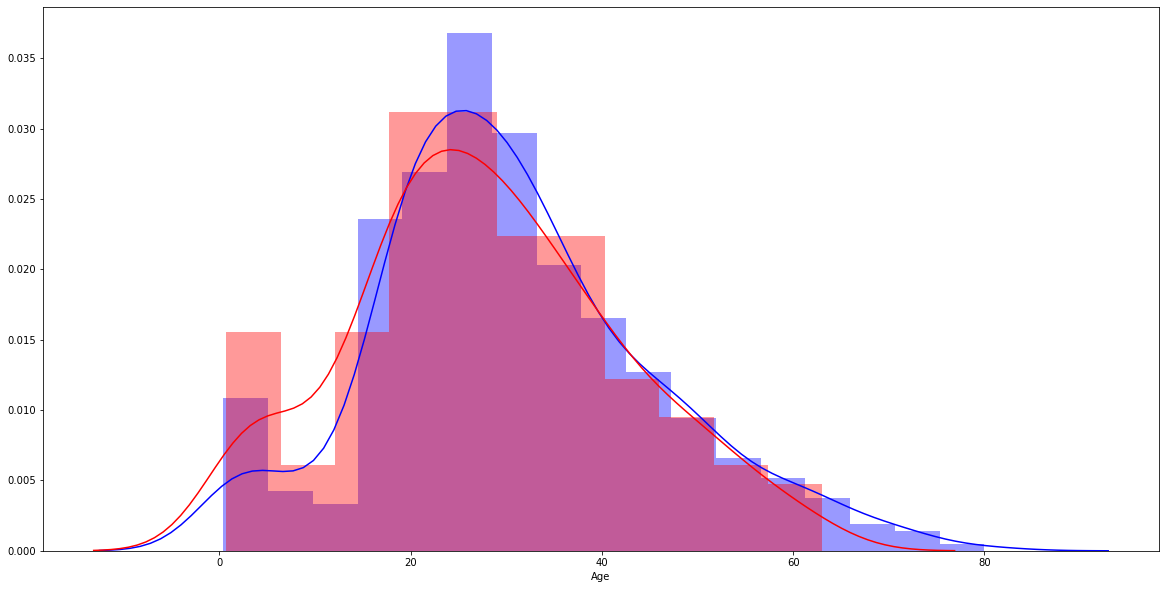

In [54]:
plt.figure(figsize=(20,10))
sns.distplot(titanic[titanic.Sex=='male'].Age, color='blue')
sns.distplot(titanic[titanic.Sex=='female'].Age, color='red')